En este trabajo consideraremos un movimiento parabolico sin fricción en el cual escribiremos un codigo que solucione las posiciones X y Y.

el movimiento esta descrito por la siguiente ecuación:

$$\vec{F_{d}}=C_{d} V^{2}$$

Realizando sumatoria de fuerzas tenemos:

$$m\vec{a}=-m\vec{g}+F_{d}$$

$$m\frac{dv_{x}}{dt}=-\vec{F_{d}}cos(\theta )$$

$$m\frac{dv_{y}}{dt}=-\vec{F_{d}}sen(\theta )-m\vec{g}$$

Reemplazando el valor de $\vec{F_{d}}$ tenemos:

$$m\frac{dv_{x}}{dt}=-C_{d} V^{2}cos(\theta )$$

$$m\frac{dv_{y}}{dt}=-C_{d} V^{2}sen(\theta )-m\vec{g}$$

Por tanto las ecuaciones que rigen el movimiento son:

$$m\frac{dv_{x}}{dt}=-C_{d} V V_{x}$$

$$m\frac{dv_{y}}{dt}=-C_{d} V V_{y}-m\vec{g}$$

las cuales estan acopladas por el factor;

$$V=\sqrt{V_{x}^{2}+V_{y}^{2}}$$


Como tenemos dos ecuaciones de sgundo orden procedemos a vajarles el orden con el proposito de realizar el metodo numerico runge kutta orden 4 para solucionar ecuaciones diferenciales de primer orden.

$$\frac{dx}{dt}=V_{x}$$

$$\frac{dy}{dt}=V_{y}$$

$$\frac{dv_{x}}{dt}=-\frac{C_{d}}{m}\sqrt{V_{x}^{2}+V_{y}^{2}} V_{x}$$

$$\frac{dv_{y}}{dt}=-\frac{C_{d}}{m}\sqrt{V_{x}^{2}+V_{y}^{2}} V_{y}-\vec{g}$$

Con estas ecuaciones de primer orden procedimos ha hacer el código asumiendo los siguientes parametros:

\begin{equation}
v_{0}=15 [m/s]\\
\theta_{0}=45^o\\
x_{0}=y_{0}=0
\end{equation}

In [2]:
from math import sin,exp,sqrt,cos,pi
from numpy import arange,array,shape
from pylab import plot,xlabel,ylabel,show,grid

In [1]:
def f(t,ro,c,m,g):
    vx=ro[2]
    vy=ro[3]
    dx=vx
    dy=vy
    dvx=-(c/m)*sqrt(((vx)**2) + ((vy)**2))*vx
    dvy=-(c/m)*sqrt(((vx)**2) + ((vy)**2))*vy-g
    return array([dx,dy,dvx,dvy]) 

In [9]:
#condiciones iniciales
c=0
m=1
g=9.8
xo=0
yo=0
vo=15
theta=(pi/4)

vox=vo*cos(theta)
voy=vo*sin(theta)

ro=array([xo,yo,vox,voy]) #vector condiciones iniciales

to=0
tf=2.5
h=0.001
tp=arange(to,tf,h)
rp=[]
for t in tp:
    rp.append(list(ro))
    k1 = (h*f(t,ro,c,m,g))
    k2 = (h*f(t+0.5*h,ro+0.5*k1,c,m,g))
    k3 = (h*f(t+0.5*h,ro+0.5*k2,c,m,g))
    k4 = (h*f(t+h,ro+k3,c,m,g))
    ro += (k1+2*k2+2*k3+k4)/6
       


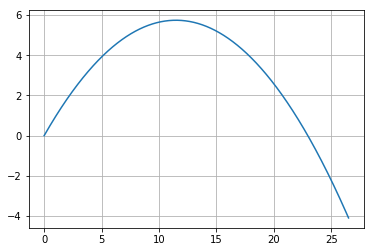

In [10]:
rp = array(rp)
shape(rp[:,0])
plot(rp[:,0],rp[:,1])
grid("on")
#plot(tp,rp[0][:])

Luego procedimos a calcular el $X_{max}$, para compararlo con el teorico.

Para calucular el valor teórico utilizamos las ecuaciones del movimiento parabolico, de las cuales despejamos el tiempo y lo reemplzamos y asi óbtuvimos dicho valor.

$$X=V_{0} cos(\theta)t$$

$$Y=V_{0}  sen(\theta) t + \frac{1}{2}gt^{2}$$

$$t=\frac{2V_{0}sen(\theta)}{g}$$

$$X_{max}=V_{0} cos(\theta)\left ( \frac{2V_{0}sen(\theta)}{g} \right )$$ 

$$X_{max}=\left ( \frac{2V_{0}^{2}}{g} \right )cos(\theta)sen(\theta)$$ 

$$X_{max}=\left ( \frac{V_{0}^{2}}{g} \right )sen(2\theta)$$ 

Reemplazando datos tenemos:

\begin{equation}
 X_{max}=\frac{15^{2}sen\left ( 90^{^{o}}  \right )}{2\left ( 9.8 \right )}=22.9591[m]
\end{equation}

[0.0, 22.952686117314475, 22.96329271903227]


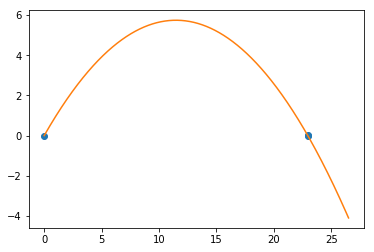

In [11]:
x=rp[:,0]
y=rp[:,1]
Xmax=[]
ycer=[]
for i in range(len(y)):
    if y[i]<0.01 and y[i]>-0.01:
        Xmax.append(x[i])
        ycer.append(y[i])
        

print(Xmax)
plot(Xmax,ycer,'o')
plot(rp[:,0],rp[:,1])
show()

In [12]:
Xmaxt=(vo**2)*sin(2*theta)/g
print(Xmaxt)

22.959183673469386


In [13]:
error=abs((Xmaxt-Xmax[2])/Xmaxt)*100
print(error)


0.017897176229453436
